In [1]:
import _pickle as pickle
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import timeit

from itertools import product

In [2]:
map_eval_name = {
    "pretraining": "",
    "pretrain-sample_high_prob_class_only-start_pos_0": "Condition on High Frequency",
    "pretrain-sample_low_prob_class_only-start_pos_0": "Condition on Low Frequency",
    "pretrain-sample_high_prob_class_only-start_pos_0-flip_label": "Condition on High Frequency",
    "pretrain-sample_low_prob_class_only-start_pos_0-flip_label": "Condition on Low Frequency",
    
    "pretrain-sample_high_prob_class_only-start_pos_1": "Condition on High Frequency",
    "pretrain-sample_low_prob_class_only-start_pos_1": "Condition on Low Frequency",
    "pretrain-sample_high_prob_class_only-start_pos_1-flip_label": "Condition on High Frequency",
    "pretrain-sample_low_prob_class_only-start_pos_1-flip_label": "Condition on Low Frequency",
    
    "pretrain-sample_high_prob_class_only-start_pos_7": "Condition on High Frequency",
    "pretrain-sample_low_prob_class_only-start_pos_7": "Condition on Low Frequency",
    "pretrain-sample_high_prob_class_only-start_pos_7-flip_label": "Condition on High Frequency",
    "pretrain-sample_low_prob_class_only-start_pos_7-flip_label": "Condition on Low Frequency",
}

stats_keys = [
    "accuracy",
    "p_iwl",
    "context contains query class",
    "loss",
    "ic_pred",
    "iw_pred",
]

In [3]:
repo_path = "/Users/chanb/research/ualberta/simple_icl"
results_dir = "/Users/chanb/research/ualberta/simple_icl/results/simple_icl/results"

# repo_path = "/home/chanb/src/simple_icl"
# results_dir = "/home/chanb/scratch/simple_icl/results"

In [4]:
variant_name = "simple_icl-fixed_g"
# variant_name = "simple_icl-learned_g"
# variant_name = "simple_icl-transformer"
# variant_name = "simple_icl-transformer-non_linear"

checkpoint_steps = 500

stats_file = os.path.join(repo_path, "cc_utils/plots/agg_stats", "{}.feather".format(variant_name))
stats = pd.read_feather(stats_file)

os.makedirs(
    os.path.join(repo_path, "cc_utils/plots/acc-plots", variant_name),
    exist_ok=True
)

results_dir = os.path.join(results_dir, variant_name)
eval_namess = [
    [
        "pretraining"
    ],
    [
        "pretrain-sample_high_prob_class_only-start_pos_0",
        "pretrain-sample_low_prob_class_only-start_pos_0",
    ],
    [
        "pretrain-sample_high_prob_class_only-start_pos_0-flip_label",
        "pretrain-sample_low_prob_class_only-start_pos_0-flip_label",
    ],
    [
        "pretrain-sample_high_prob_class_only-start_pos_1",
        "pretrain-sample_low_prob_class_only-start_pos_1",
    ],
    [
        "pretrain-sample_high_prob_class_only-start_pos_1-flip_label",
        "pretrain-sample_low_prob_class_only-start_pos_1-flip_label",
    ],
    [
        "pretrain-sample_high_prob_class_only-start_pos_7",
        "pretrain-sample_low_prob_class_only-start_pos_7",
    ],
    [
        "pretrain-sample_high_prob_class_only-start_pos_7-flip_label",
        "pretrain-sample_low_prob_class_only-start_pos_7-flip_label",
    ],
]
plot_names = [
    "pretraining",
    "iwl",
    "iwl-flip_label",
    "icl-last_context",
    "icl-last_context-flip_label",
    "icl-except_first_context",
    "icl-except_first_context-flip_label",
]
plot_titles = [
    "Pretraining",
    "In-weight Evaluation",
    "In-weight Evaluation with Flipped Label",
    "In-context Evaluation with Last Context",
    "In-context Evaluation with Last Context + Flipped Label",
    "In-context Evaluation with Contexts but First",
    "In-context Evaluation with Contexts but First + Flipped Label",
]

map_stats_key = {
    "p_iwl": "$\\alpha(x)$",
    "accuracy": "Accuracy",
    "context contains query class": "Context Contains Query Class",
    "loss": "Loss",
    "ic_pred": "In-context Accuracy",
    "iw_pred": "In-weight Accuracy"
}

map_variant = {
    "ground_truth_prob": "$P(g(x) = c)$",
    "high_prob": "$P(high\_freq.)$"
}

In [5]:
variants = stats["variant"].unique()

# Plot Accuracy based on Checkpoint Intervals

In [6]:
stats["stats_key"].unique()

array(['accuracy', 'p_iwl', 'context contains query class', 'ic_pred',
       'iw_pred', 'num p_iwl >= 0.5',
       'p_iwl given context contains query class', 'loss'], dtype=object)

In [7]:
stats[stats["stats_key"] == "p_iwl given context contains query class"]

,variant,seed,eval_name,stats_key,stats,high_prob
6,high_prob_0.5,seed_9,pretrain-icl_iid_context,p_iwl given context contains query class,"[0.5080160320641283, 0.5080160320641283, 0.550...",0.5
14,high_prob_0.5,seed_9,pretrain-sample_high_prob_class_only-start_pos_0,p_iwl given context contains query class,"[0.933852140077821, 0.6381322957198443, 0.0038...",0.5
22,high_prob_0.5,seed_9,pretrain-sample_high_prob_class_only-start_pos...,p_iwl given context contains query class,"[0.9183266932270916, 0.5836653386454184, 0.009...",0.5
30,high_prob_0.5,seed_9,pretrain-sample_high_prob_class_only-start_pos_1,p_iwl given context contains query class,"[0.892, 0.73, 0.46, 0.754, 0.789, 0.924, 0.946...",0.5
38,high_prob_0.5,seed_9,pretrain-sample_high_prob_class_only-start_pos...,p_iwl given context contains query class,"[0.9, 0.753, 0.464, 0.774, 0.793, 0.937, 0.96,...",0.5
...,...,...,...,...,...,...
32126,high_prob_0.5,seed_3,test-sample_low_prob_class_only-start_pos_6,p_iwl given context contains query class,"[0.987, 0.983, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1...",0.5
32134,high_prob_0.5,seed_3,test-sample_low_prob_class_only-start_pos_6-fl...,p_iwl given context contains query class,"[0.991, 0.987, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1...",0.5
32142,high_prob_0.5,seed_3,test-sample_low_prob_class_only-start_pos_7,p_iwl given context contains query class,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.5
32150,high_prob_0.5,seed_3,test-sample_low_prob_class_only-start_pos_7-fl...,p_iwl given context contains query class,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.5


In [8]:
for eval_names, plot_name, plot_title in zip(eval_namess, plot_names, plot_titles):
    tic = timeit.default_timer()

    agg_stats = dict()
    for variant in variants:
        agg_stats.setdefault(variant, dict())
        for eval_name in eval_names:
            agg_stats[variant].setdefault(eval_name, dict())
            for stats_key in stats_keys:
                curr_stats = stats.loc[
                    (stats["variant"] == variant)
                    & (stats["eval_name"] == eval_name)
                    & (stats["stats_key"] == stats_key)
                ]["stats"].to_list()

                if len(curr_stats) == 0:
                    continue
                agg_stats[variant][eval_name][stats_key] = (
                    np.mean(curr_stats, axis=0),
                    np.std(curr_stats, axis=0),
                )

    for variant in variants:
        os.makedirs(os.path.join(repo_path, "cc_utils/plots/acc-plots", variant_name, variant), exist_ok=True)
        for stats_key in stats_keys:
            if stats_key in ["p_iwl", "context contains query class"]:
                continue
            if stats_key not in agg_stats[variant][eval_name]:
                print("{} skipped".format(stats_key))
                continue

            fig, axes = plt.subplots(1, len(eval_names), figsize=(5 * len(eval_names), 5))
            for eval_i, eval_name in enumerate(eval_names):
                if len(eval_names) > 1:
                    ax = axes[eval_i]
                else:
                    ax = axes
                x_range = np.arange(len(agg_stats[variant][eval_name]["accuracy"][0])) * checkpoint_steps
                ax.plot(
                    x_range,
                    np.array(agg_stats[variant][eval_name][stats_key][0]),
                    label="Model" if eval_i == 0 else "",
                    linewidth=3,
                    c="red",
                    alpha=0.7,
                )
                
                if "p_iwl" in agg_stats[variant][eval_name]:
                    ax.plot(
                        x_range,
                        agg_stats[variant][eval_name]["p_iwl"][0],
                        label="$\\alpha(x)$" if eval_i == 0 else "",
                        linestyle="--",
                        c="black",
                        alpha=0.3
                    )
                ax.plot(
                    x_range,
                    agg_stats[variant][eval_name]["context contains query class"][0],
                    label="% $\geq 1$ Context from Query Class" if eval_i == 0 else "",
                    linestyle="-.",
                    c="black",
                    alpha=0.3
                )
                ax.set_ylim(-0.1, 1.1)
                ax.set_title(map_eval_name[eval_name])

            fig.supylabel(map_stats_key[stats_key])
            fig.supxlabel("Gradient Steps")
            fig.suptitle(plot_title)
            fig.legend(
                bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
                loc="lower center",
                ncols=5,
                borderaxespad=0.0,
                frameon=True,
                fontsize="8", 
            )

            plt.savefig(
                os.path.join(repo_path, "cc_utils/plots/acc-plots", "{}/{}/{}-{}.png".format(variant_name, variant, stats_key, plot_name)),
                format="png",
                bbox_inches="tight",
                dpi=600,
            )
            plt.close(fig)

    toc = timeit.default_timer()
    print("Done {} {} {} in {}s".format(variant_name, variant, eval_name, toc - tic))

Done simple_icl-learned_g high_prob_0.9 pretraining in 13.551446208031848s
Done simple_icl-learned_g high_prob_0.9 pretrain-sample_low_prob_class_only-start_pos_0 in 26.885219041025266s
Done simple_icl-learned_g high_prob_0.9 pretrain-sample_low_prob_class_only-start_pos_0-flip_label in 27.031747375032865s
Done simple_icl-learned_g high_prob_0.9 pretrain-sample_low_prob_class_only-start_pos_1 in 26.483618375030346s
Done simple_icl-learned_g high_prob_0.9 pretrain-sample_low_prob_class_only-start_pos_1-flip_label in 27.35938341601286s
Done simple_icl-learned_g high_prob_0.9 pretrain-sample_low_prob_class_only-start_pos_7 in 27.12455404200591s
Done simple_icl-learned_g high_prob_0.9 pretrain-sample_low_prob_class_only-start_pos_7-flip_label in 27.594590833003167s


# Aggregate Important Plots

In [ ]:

eval_names = [
    "pretrain-sample_high_prob_class_only-start_pos_0",
    "pretrain-sample_low_prob_class_only-start_pos_0",
    "pretrain-sample_high_prob_class_only-start_pos_0-flip_label",
    "pretrain-sample_low_prob_class_only-start_pos_0-flip_label",
    "pretrain-sample_high_prob_class_only-start_pos_1",
    "pretrain-sample_low_prob_class_only-start_pos_1",
    "pretrain-sample_high_prob_class_only-start_pos_1-flip_label",
    "pretrain-sample_low_prob_class_only-start_pos_1-flip_label",
]

y_axis_groups = [
    "Start Pos @ 0",
    "Start Pos @ 0 w/ Flipped",
    "Start Pos @ 1",
    "Start Pos @ 1 w/ Flipped",
]

In [ ]:

tic = timeit.default_timer()

agg_stats = dict()
for variant in variants:
    agg_stats.setdefault(variant, dict())
    for eval_name in eval_names:
        agg_stats[variant].setdefault(eval_name, dict())
        for stats_key in stats_keys:
            curr_stats = stats.loc[
                (stats["variant"] == variant)
                & (stats["eval_name"] == eval_name)
                & (stats["stats_key"] == stats_key)
            ]["stats"].to_list()

            if len(curr_stats) == 0:
                continue
            agg_stats[variant][eval_name][stats_key] = (
                np.mean(curr_stats, axis=0),
                np.std(curr_stats, axis=0),
            )

for variant in variants:
    os.makedirs(os.path.join(repo_path, "cc_utils/plots/acc-plots", variant_name, variant), exist_ok=True)
    for stats_key in stats_keys:
        if stats_key in ["p_iwl", "context contains query class"]:
            continue
        fig, axes = plt.subplots(len(eval_names) // 2, 2, figsize=(7, 3 * len(eval_names) // 2))
        for eval_i, eval_name in enumerate(eval_names):
            if len(eval_names) > 2:
                ax = axes[eval_i // 2, eval_i % 2]
            elif len(eval_names) > 1:
                ax = axes[eval_i]
            else:
                ax = axes
            x_range = np.arange(len(agg_stats[variant][eval_name]["accuracy"][0])) * checkpoint_steps
            ax.plot(
                x_range,
                np.array(agg_stats[variant][eval_name][stats_key][0]),
                label="Model" if eval_i == 0 else "",
                linewidth=3,
                c="red",
                alpha=0.7,
            )
            
            if "p_iwl" in agg_stats[variant][eval_name]:
                ax.plot(
                    x_range,
                    agg_stats[variant][eval_name]["p_iwl"][0],
                    label="$\\alpha(x)$" if eval_i == 0 else "",
                    linestyle="--",
                    c="black",
                    alpha=0.3
                )
            ax.plot(
                x_range,
                agg_stats[variant][eval_name]["context contains query class"][0],
                label="% $\geq 1$ Context from Query Class" if eval_i == 0 else "",
                linestyle="-.",
                c="black",
                alpha=0.3
            )
            ax.set_ylim(-0.1, 1.1)
            ax.ticklabel_format(style='sci', scilimits=(0, 0), axis='x')

            if eval_i < 2:
                ax.set_title(map_eval_name[eval_name])

            if eval_i % 2 == 0:
                ax.set_ylabel(y_axis_groups[eval_i // 2])

        fig.supylabel(map_stats_key[stats_key])
        fig.supxlabel("Gradient Steps")
        fig.suptitle(plot_title)
        fig.legend(
            bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
            loc="lower center",
            ncols=5,
            borderaxespad=0.0,
            frameon=True,
            fontsize="8", 
        )

        plt.tight_layout()
        plt.savefig(
            os.path.join(repo_path, "cc_utils/plots/acc-plots", "{}/{}/{}-combined.png".format(variant_name, variant, stats_key)),
            format="png",
            bbox_inches="tight",
            dpi=600,
        )
        plt.close(fig)

toc = timeit.default_timer()
print("Done {} {} {} in {}s".format(variant_name, variant, eval_name, toc - tic))

# Bias-Variance IC Predictor and IW Predictor
For fixed $h$ and $g$ we have zero variance.

In [7]:
stats

,variant,seed,eval_name,stats_key,stats,high_prob,high_freq_prob,low_freq_prob
0,high_prob_0.99-high_freq_prob_0.99-low_freq_pr...,seed_1,pretrain-icl_iid_context,accuracy,"[0.9890000000000001, 0.9890000000000001, 0.989...",0.99,0.99,0.010000000000000009
1,high_prob_0.99-high_freq_prob_0.99-low_freq_pr...,seed_1,pretrain-icl_iid_context,p_iwl,"[0.4331905245780945, 0.06063665449619293, 0.04...",0.99,0.99,0.010000000000000009
2,high_prob_0.99-high_freq_prob_0.99-low_freq_pr...,seed_1,pretrain-icl_iid_context,context contains query class,"[0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.9...",0.99,0.99,0.010000000000000009
3,high_prob_0.99-high_freq_prob_0.99-low_freq_pr...,seed_1,pretrain-icl_iid_context,ic_pred,"[0.9890000224113464, 0.9890000224113464, 0.989...",0.99,0.99,0.010000000000000009
4,high_prob_0.99-high_freq_prob_0.99-low_freq_pr...,seed_1,pretrain-icl_iid_context,iw_pred,"[0.017000000923871994, 0.02200000174343586, 0....",0.99,0.99,0.010000000000000009
...,...,...,...,...,...,...,...,...
32155,high_prob_0.75-high_freq_prob_0.75-low_freq_pr...,seed_1,pretraining,ic_pred,"[0.9480000734329224, 0.9480000734329224, 0.948...",0.75,0.75,0.25
32156,high_prob_0.75-high_freq_prob_0.75-low_freq_pr...,seed_1,pretraining,iw_pred,"[0.6200000047683716, 0.5920000076293945, 0.616...",0.75,0.75,0.25
32157,high_prob_0.75-high_freq_prob_0.75-low_freq_pr...,seed_1,pretraining,num p_iwl >= 0.5,"[0.135, 0.08, 0.056, 0.052, 0.052, 0.052, 0.05...",0.75,0.75,0.25
32158,high_prob_0.75-high_freq_prob_0.75-low_freq_pr...,seed_1,pretraining,p_iwl given context contains query class,"[0.14135021097046413, 0.029535864978902954, 0....",0.75,0.75,0.25


In [29]:
eval_names = [
    "pretrain-sample_high_prob_class_only-start_pos_0",
    "pretrain-sample_low_prob_class_only-start_pos_0",
    "pretrain-sample_high_prob_class_only-start_pos_1",
    "pretrain-sample_low_prob_class_only-start_pos_1",
]
high_prob_values = stats["high_prob"].unique()

stats_keys = [
    "p_iwl",
    "context contains query class",
]
y_axis_groups = [
    "Start Pos @ 0",
    "Start Pos @ 1",
]
x_axis_groups = [
    "P(g(x) = high freq. | x $\\in$ high freq.)",
    "1 - P(g(x) = low freq. | x $\\in$ low freq.)"
]

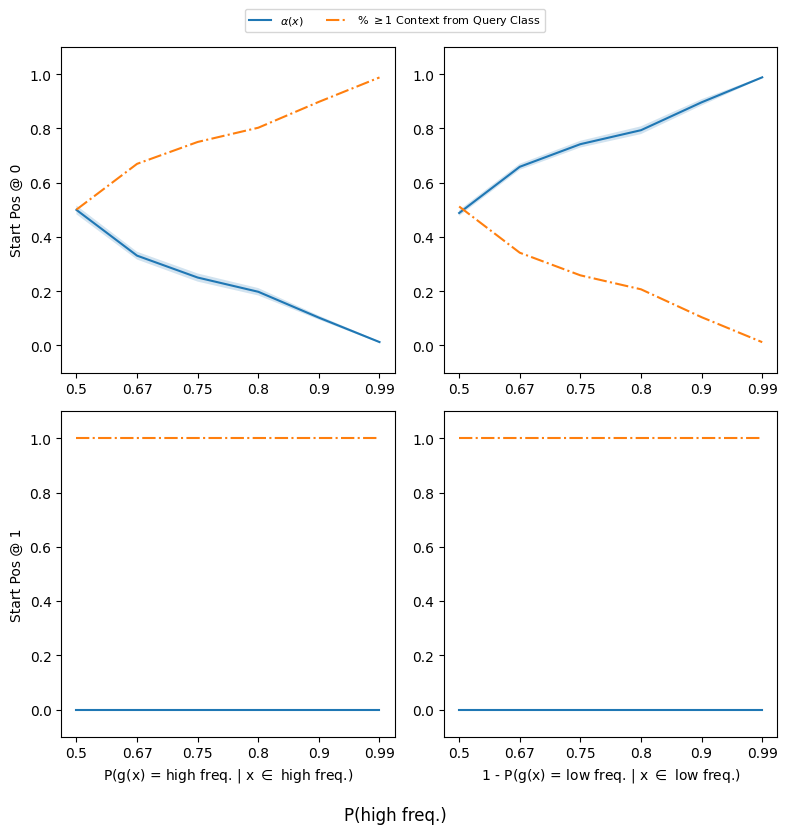

In [33]:
# TODO: Think about how to plot this
agg_stats = dict()
for eval_name in eval_names:
    agg_stats[eval_name] = dict()
    for high_prob_value in high_prob_values:
        agg_stats[eval_name].setdefault(high_prob_value, dict())
        for stats_key in stats_keys:
            curr_stats = stats.loc[
                (stats["high_prob"] == high_prob_value)
                & (stats["eval_name"] == eval_name)
                & (stats["stats_key"] == stats_key)
            ]["stats"].to_list()

            if len(curr_stats) == 0:
                continue
            agg_stats[eval_name][high_prob_value][stats_key] = (
                np.mean(curr_stats, axis=0),
                np.std(curr_stats, axis=0),
            )

x_range = sorted(high_prob_values)
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for eval_i, eval_name in enumerate(eval_names):
    if len(eval_names) > 2:
        ax = axes[eval_i // 2, eval_i % 2]
    elif len(eval_names) > 1:
        ax = axes[eval_i]
    else:
        ax = axes

    means = np.array([agg_stats[eval_name][high_prob_value]["p_iwl"][0][-1] for high_prob_value in x_range])
    stds = np.array([agg_stats[eval_name][high_prob_value]["p_iwl"][1][-1] for high_prob_value in x_range])
    ax.plot(
        x_range,
        means,
        label="$\\alpha(x)$" if eval_i == 0 else ""
    )

    ax.fill_between(
        x_range,
        means - stds,
        means + stds,
        alpha=0.2,
    )

    ax.plot(
        x_range,
        [agg_stats[eval_name][high_prob_value]["context contains query class"][0][-1] for high_prob_value in x_range],
        label="% $\geq 1$ Context from Query Class" if eval_i == 0 else "",
        linestyle="-."
    )

    ax.set_ylim(-0.1, 1.1)

    # if eval_i < 2:
    #     ax.set_title(map_eval_name[eval_name])
    
    if eval_i >= 2:
        ax.set_xlabel(x_axis_groups[eval_i % 2])

    if eval_i % 2 == 0:
        ax.set_ylabel(y_axis_groups[eval_i // 2])

fig.supxlabel("P(high freq.)")
fig.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=2,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)

plt.tight_layout()
plt.show()


In [ ]:
variant_1 = "high_prob"
variant_2 = "ground_truth_prob"

variant_1_values = sorted([float(el) for el in stats[variant_1].unique()])
variant_2_values = sorted([float(el) for el in stats[variant_2].unique()])

In [ ]:
def compute_bias_iw(ground_truth_prob):
    return -np.log(np.clip(ground_truth_prob, a_min=1e-8))

def compute_bias_ic(high_prob, label, num_examples=8):
    label_ind = np.argmax(label, axis=-1)
    return -np.log(((num_examples - 1) + ((1 - label_ind) * high_prob + label_ind * (1 - high_prob))) / num_examples, a_min=1e-8)

In [ ]:
checkpoint_i = -1


os.makedirs(
    os.path.join(repo_path, "cc_utils/plots/iw_ic-plots", variant_name),
    exist_ok=True
)

for eval_names, plot_name, plot_title in zip(eval_namess, plot_names, plot_titles):
    tic = timeit.default_timer()

    agg_stats = dict()
    for (variant_1_value, variant_2_value) in product(variant_1_values, variant_2_values):
        agg_stats.setdefault((variant_1_value, variant_2_value), dict())
        for eval_name in eval_names:
            agg_stats[(variant_1_value, variant_2_value)].setdefault(eval_name, dict(mean=[], std=[]))

            for stats_key in ["iw_pred", "ic_pred", "p_iwl"]:
                curr_stats = stats.loc[
                    (stats[variant_1] == str(variant_1_value))
                    & (stats[variant_2] == str(variant_2_value))
                    & (stats["eval_name"] == eval_name)
                    & (stats["stats_key"] == stats_key)
                ]["stats"].to_list()

                agg_stats[(variant_1_value, variant_2_value)][eval_name]["mean-{}".format(stats_key)] = (
                    np.mean(curr_stats, axis=0)[checkpoint_i].item()
                )
                agg_stats[(variant_1_value, variant_2_value)][eval_name]["std-{}".format(stats_key)] = (
                    np.std(curr_stats, axis=0)[checkpoint_i].item()
                )

    fig, axes = plt.subplots(1, len(eval_names), figsize=(1 + 4 * len(eval_names), 5))
    for eval_i, eval_name in enumerate(eval_names):
        if len(eval_names) > 1:
            ax = axes[eval_i]
        else:
            ax = axes

        plot_res = {
            "$e(IW) < e(IC)$": [],
            "$e(IW) > e(IC)$": [],
            "$e(IW) = e(IC)$": [],
        }
        for (variant_1_value, variant_2_value), curr_stats in agg_stats.items():
            acc_delta = (
                np.array(curr_stats[eval_name]["mean-iw_pred"])
                - np.array(curr_stats[eval_name]["mean-ic_pred"])
            )

            if acc_delta > 0:
                plot_key = "$e(IW) < e(IC)$"
            elif acc_delta < 0:
                plot_key = "$e(IW) > e(IC)$"
            else:
                plot_key = "$e(IW) = e(IC)$"

            plot_res[plot_key].append((variant_1_value, variant_2_value, acc_delta, curr_stats[eval_name]["mean-p_iwl"]))

        for plot_key in plot_res:
            curr_data = np.array(plot_res[plot_key])
            if len(curr_data) == 0:
                continue

            ax.scatter(
                curr_data[:, 0],
                curr_data[:, 1],
                s=3 + 20 * np.abs(curr_data[:, 2]),
                label=plot_key if eval_i == 0 else "",
                alpha=np.abs(curr_data[:, 3] - 0.5) * 2,
                marker="o",
            )

        ax.set_title(map_eval_name[eval_name])

    fig.supxlabel(map_variant[variant_1])
    fig.supylabel(map_variant[variant_2])
    fig.suptitle(plot_title)
    fig.legend(
        bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
        loc="lower center",
        ncols=math.ceil(len(variant_1_values) / 2),
        borderaxespad=0.0,
        frameon=True,
        fontsize="8", 
    )

    plt.savefig(
        os.path.join(repo_path, "cc_utils/plots/iw_ic-plots", variant_name, "{}.png".format(plot_name)),
        format="png",
        bbox_inches="tight",
        dpi=600,
    )
    plt.close(fig)

    toc = timeit.default_timer()
    print("Done {} {} in {}s".format(variant_name, eval_name, toc - tic))

In [ ]:
# TODO: x y axes the biases, use colour to indicate alpha(x)

# Individual Check

In [ ]:
stats["stats_key"].unique()

In [ ]:
stats.loc[
    # (stats["variant"] == "high_prob_0.8-ground_truth_prob_0.0")
    # & (stats["eval_name"] == "pretrain-sample_low_prob_class_only-start_pos_0")
    # & (stats["seed"] == "seed_0")
    # & (stats["stats_key"] == "p_iwl")
    (stats["eval_name"] == "pretrain-sample_low_prob_class_only-start_pos_0")
    & (stats["seed"] == "seed_0")
    & (stats["stats_key"] == "iw_pred")
]